Name: **DONG**

Assignment 12: **Unsupervised Machine Learning with Python**


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split # for data splitting

**Data Selection and Preprocessing**

As part of the preprocessing phase, we needed to merge the wine_name and wine_data files to create a single, cohesive dataset. This combined file was then easily imported into pandas as a CSV, with the comma serving as the standard delimiter.

In [103]:
wine = pd.read_csv(r"D:\Willis\Introduction_To_Math_for_Machine_Learning\Lesson12\wine_data\wine.data.csv")
wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenol,Proanthocyanins,Color intensity,Hue,OD280_OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [126]:
wine.drop(columns = 'Class').describe()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenol,Proanthocyanins,Color intensity,Hue,OD280_OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [105]:
wine['Class'].unique()

array([1, 2, 3], dtype=int64)

In [107]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenol           178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280_OD315 of diluted wines  178 non-null    float64
 13  Proli

Given that data are on different scales and most probably have different units, it is generally recommended to normalize or standardize the data before performing clustering algorithms such as DBSCAN, Hierarchical Clustering, Kmeans.  We will used the StandarScaler here given that clustering algorithms are very sensible to features with larger variance.

In [141]:
# normalization:
scaler = StandardScaler()
df = scaler.fit_transform(wine.drop(columns = 'Class'))
df_features = pd.DataFrame(df, columns=data.columns, index=data.index)
del df # given that it is a numpy array. 
df_features.tail()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenol,Proanthocyanins,Color intensity,Hue,OD280_OD315 of diluted wines,Proline
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498
177,1.395086,1.583165,1.365208,1.502943,-0.262708,-0.392751,-1.274305,1.596623,-0.422075,1.791666,-1.524378,-1.428948,-0.595160


We found no missing data and the data types are correct, so no further preprocessing is needed  at this point.

**Hierarchical Clustering Implementation**

    Implement hierarchical clustering using Python and the appropriate libraries (e.g., scikit-learn or scipy).
    Select a suitable linkage method (e.g., ward, complete, average) and distance metric (e.g., Euclidean distance) based on the nature of the dataset and the desired clustering outcome.

##### Kmeans

In [176]:
# determine the ptimal number of cluster
elbow = []
for k in range(1,9):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_features)
    print(f"\n{k} correspond to {kmeans.inertia_}")
    elbow.append(kmeans.inertia_)


C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMe


1 correspond to 2314.0000000000005

2 correspond to 1658.7588524290954

3 correspond to 1277.928488844642

4 correspond to 1175.428333103347

5 correspond to 1109.5127392938243

6 correspond to 1046.0023332143637


C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



7 correspond to 981.5952326111659

8 correspond to 935.2012114738546


C:\Users\LENOVO\anaconda3\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


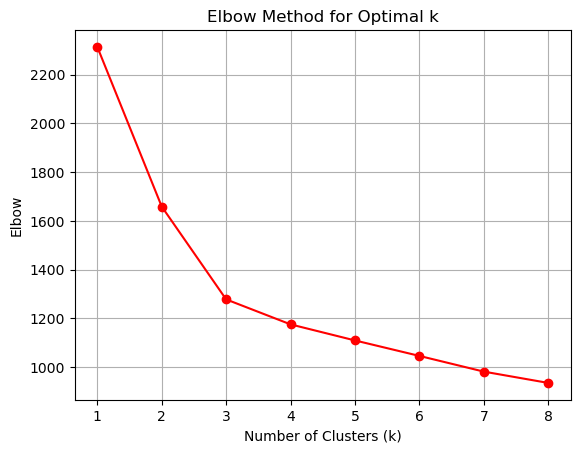

In [165]:
plt.plot(range(1,9), elbow, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Elbow')
plt.title('Elbow Method for Optimal k')
plt.grid(True) 

The optimal number of cluster is k = 3

In [ ]:
# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)